In [1]:
#1 - Após recebermos uma base enriquecida precisamos dividir entre Treino e Teste, para evitar Data Leakage.
#Data Leakage é uma falha que acontece durante os testes de um modelo de machine learning,
#no qual informações são compartilhadas entre um conjunto de dados usado no treinamento
#e outro conjunto de dados que é usado para validar essa modelagem, também chamado de dataset de testes.

In [2]:
#importando bibliotecas para uso
import pandas as pd
from funcoes import perfil_base,plot_safra_bad_rate
import matplotlib.pyplot as plt

In [3]:
#Lendo a base de dados fornecida
base_modelo = pd.read_csv("base_modelo.csv",sep=",")

In [4]:
#A função perfil_base auxilia na verificação de métricas básicas da base de dados
resultado = perfil_base(base_modelo, id_col='id', target_col='y', safra_col='safra')

Calcula métricas básicas do perfil da base de dados.
Shape da base: Essa base possui 10738 linhas e 81 colunas
Tipos de variáveis: {dtype('float64'): 75, dtype('int64'): 6}
IDs únicos: 10738
Taxa de maus (bad rate): Bons: 7610 (70.9%), Maus: 3128 (29.1%)
Volumetria das safras: {201401: 854, 201402: 898, 201403: 873, 201404: 955, 201405: 972, 201406: 902, 201407: 968, 201408: 912, 201409: 877, 201410: 933, 201411: 808, 201412: 786}




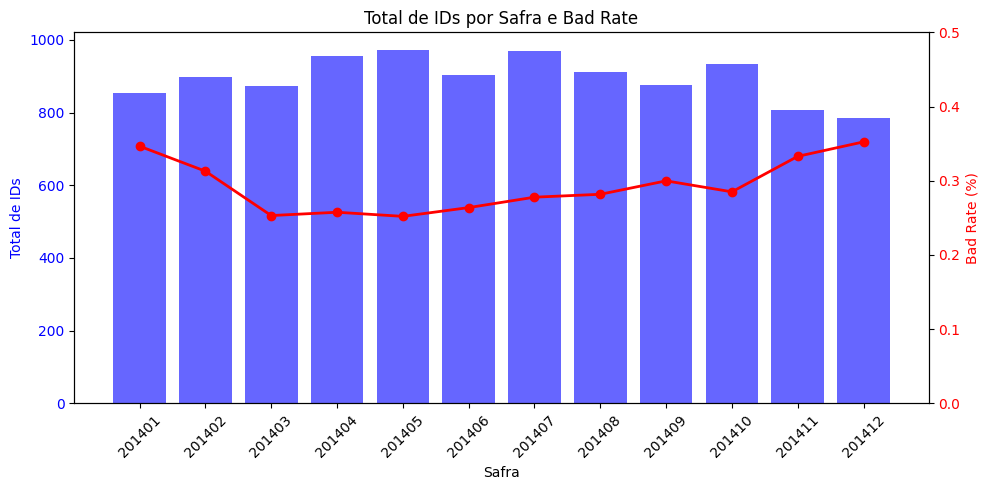

In [5]:
safra_br = plot_safra_bad_rate(base_modelo, safra_col="safra", inadimplente_col="y", bad_rate_min=0, bad_rate_max=0.5)

In [21]:
#Tabela que gerou o gráfico de contratos por safra
safra_br

,safra,contagem,total_maus,total_bons,badrate
0,201401,854,296,558,0.346604
1,201402,898,281,617,0.312918
2,201403,873,221,652,0.253150
3,201404,955,246,709,0.257592
4,201405,972,245,727,0.252058
5,201406,902,238,664,0.263858
6,201407,968,269,699,0.277893
7,201408,912,257,655,0.281798
8,201409,877,263,614,0.299886
9,201410,933,266,667,0.285102


In [16]:
#verificando a tipagem das variáveis
base_modelo.dtypes.to_frame().value_counts(0)

0
float64    75
int64       6
Name: count, dtype: int64

In [17]:
#Verificando se existem duplicatas de IDs
base_modelo['id'].nunique()

10738

In [21]:
#Verificando a Taxa de maus (bad rate) da base
base_modelo['y'].value_counts()/base_modelo['id'].nunique()

y
0    0.708698
1    0.291302
Name: count, dtype: float64

In [30]:
#verificando a quantidade de safras e suas volumetrias
base_modelo['safra'].value_counts().to_frame()

,count
safra,
201405,972
201407,968
201404,955
201410,933
201408,912
201406,902
201402,898
201409,877
201403,873


In [34]:
#Base de Treino
#Vamos utilizar os 9 primeiros meses da safra para o treinamento do modelo
treino = base_modelo[base_modelo['safra']<201410]
treino.shape

(8211, 81)

In [29]:
#verificando as safras de treino
treino['safra'].value_counts()

safra
201405    972
201407    968
201404    955
201408    912
201406    902
201402    898
201409    877
201403    873
201401    854
Name: count, dtype: int64

In [35]:
treino.to_csv("treino.csv",sep=",",index=False,header=True)

In [36]:
#Base de Teste OOT
#Vamos separar 3 meses (os mais recentes) para a base de Testes OOT
#Essa base é a que vai de fato simular o modelo "produtivo", e seu potencial preditivo.
teste_OOT = base_modelo[base_modelo['safra']>=201410]
teste_OOT.shape


(2527, 81)

In [37]:
teste_OOT['safra'].value_counts()

safra
201410    933
201411    808
201412    786
Name: count, dtype: int64

In [38]:
teste_OOT.to_csv("teste_oot.csv",sep=",",index=False,header=True)